Yet another 10,000 foot view @ [`https://github.com/squillero/10k`](https://github.com/squillero/10k)  
Copyright **©** 2022 Giovanni Squillero `<squillero@polito.it>`  
Free for personal or classroom use; see the [license](https://github.com/squillero/10k/blob/main/LICENSE.md) for details.  

------------------------------------------------------------

# Neural Networks (part 2)

In [59]:
import numpy as np
from scipy.optimize import minimize
import sympy
import matplotlib.pyplot as plt

In [55]:
sympy.init_printing(forecolor="black")

## Create an easy dataset

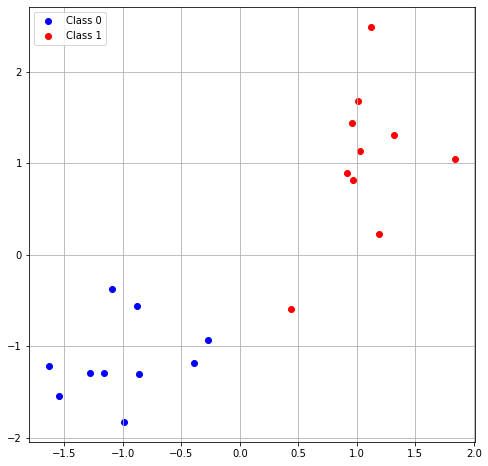

In [183]:
POINTS = 10
SCALE = 0.5
class0 = np.around(np.random.normal(loc=-1, scale=SCALE, size=(POINTS, 2)), decimals=2)
class1 = np.around(np.random.normal(loc=1, scale=SCALE, size=(POINTS, 2)), decimals=2)
plt.figure(figsize=(8, 8))
plt.scatter(x=class0[:, 0], y=class0[:, 1], c="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], c="red", label="Class 1")
plt.legend(loc="upper left")
plt.grid()
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

## Handmade Neural network

Activation: sigmoid

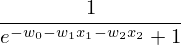

In [184]:
X1, X2, W0, W1, W2 = sympy.symbols("x_1 x_2 w_0 w_1 w_2")
p1 = W0 + W1 * X1 + W2 * X2
nn = 1 / (1 + sympy.exp(-p1))
nn

### Define *loss* and optimize parameters

See [Understanding binary cross-entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

In [185]:
def loss_function(v, e):
    return -(e * sympy.log(v) + (1 - e) * sympy.log(1 - v))


def loss_function(v, e):
    if e == 1:
        return -sympy.log(v)  # nb: log(1) = 0
    else:
        return -sympy.log(1 - v)

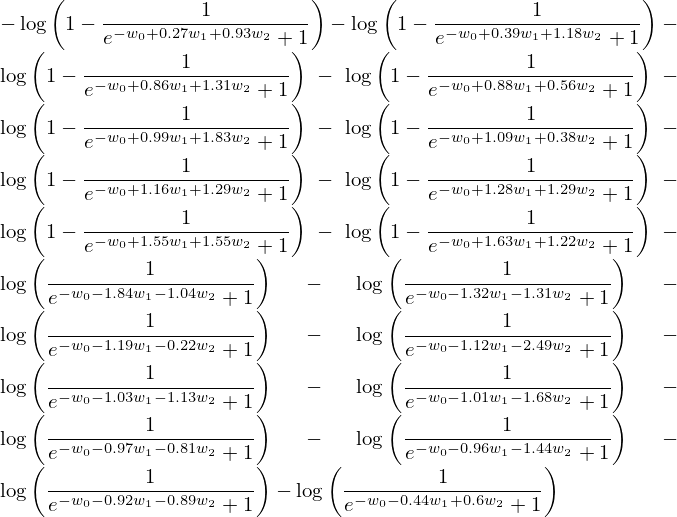

In [186]:
loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss_f = sympy.lambdify((W0, W1, W2), loss)
loss

In [187]:
start = np.random.random(3) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="nelder-mead")
print(f"Solution: {fit.x}")

Solution: [174.6828105   98.97284444 281.86245934]


### Plot NN with fitted parameters

<lambdifygenerated-80>:2: RuntimeWarning: overflow encountered in exp
  return (1.36841969999661e-76*exp(-98.9728444446335*x_1 - 281.862459344997*x_2) + 1)**(-1.0)


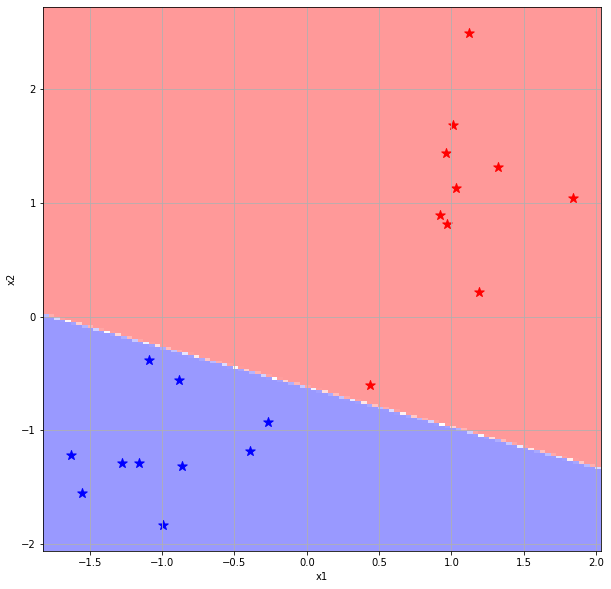

In [188]:
w0, w1, w2 = fit.x
nn_f = sympy.lambdify((X1, X2), nn.subs([(W0, w0), (W1, w1), (W2, w2)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 200))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")